Importing our libraries

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import pandas as pd

Creating the class for our regression model

In [28]:
class PolynomialRegressionModel(nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.degree = degree
        self.weights = torch.nn.Parameter(torch.randn(self.degree))
        self.bias = torch.nn.Parameter(torch.randn(1))
        
        self.loss_fn = nn.L1Loss()
        self.optimizer = optim.Adam([self.weights, self.bias], lr= 0.01)

    def forward(self, x):
        total = 0
        for i in range(len(self.weights)):
            total += x**i * self.weights[i]
        total += self.bias
        
        return total
    
    def TrainModel(self, epochs, train_X, train_Y):
        self.train()
        
        train_X = torch.tensor(train_X, dtype=torch.float32)
        train_Y = torch.tensor(train_Y, dtype=torch.float32).unsqueeze(1)
        
        for epoch in tqdm(range(epochs)):
            
            prediction = self.forward(train_X)
            loss = self.loss_fn(prediction, train_Y)
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
        self.eval()
            

Writing a function to test the performance

In [29]:
def evaluate_model(model, X, y):
    model.eval()
    
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)
        y_pred = model.forward(X_tensor)
        
        loss_fn = nn.L1Loss()
        loss = loss_fn(y_pred, y_tensor)
        
    return loss.item()


Adding another function to visualize our data and model predictions

In [30]:
def plot_model(model, X, y, x_label, y_label, title):

    X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1).astype(np.float32)
    X_range_tensor = torch.tensor(X_range)


    with torch.no_grad():
        y_pred = model.forward(X_range_tensor).numpy()


    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_range, y_pred, color='red', label='Polynomial Fit')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Finally our last function, which takes our dataframes and extracts x and y parameters we will plug in our models

In [31]:
def run_polynomial_regression(df, x_col, y_col, degree=3):
    X = df[[x_col]].dropna().values
    y = df[y_col].dropna().values
    valid_idx = (~np.isnan(X).flatten()) & (~np.isnan(y))
    X = X[valid_idx]
    y = y[valid_idx]

    model = PolynomialRegressionModel(degree=degree)
    model.TrainModel(1000, X, y)
    mse = evaluate_model(model, X, y)

    print(f"{x_col} vs {y_col} | Degree {degree} | MSE: {mse:.2f}")
    plot_model(model, X, y, x_col, y_col, f"{y_col} vs {x_col} (Degree {degree})")

Testing the models

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\ilter\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([132])) that is different to the input size (torch.Size([132, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


median_list_price vs total_crime | Degree 3 | MSE: 0.63


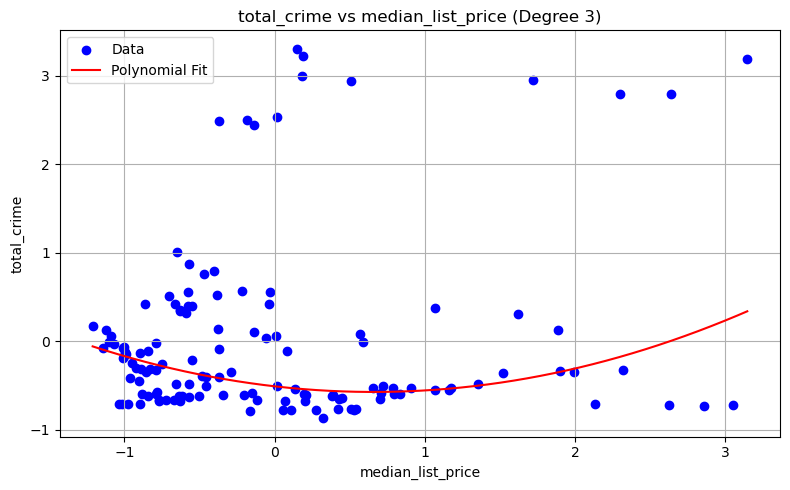

  0%|          | 0/1000 [00:00<?, ?it/s]

total_crime vs Total Homeless | Degree 3 | MSE: 0.65


C:\Users\ilter\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([297])) that is different to the input size (torch.Size([297, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


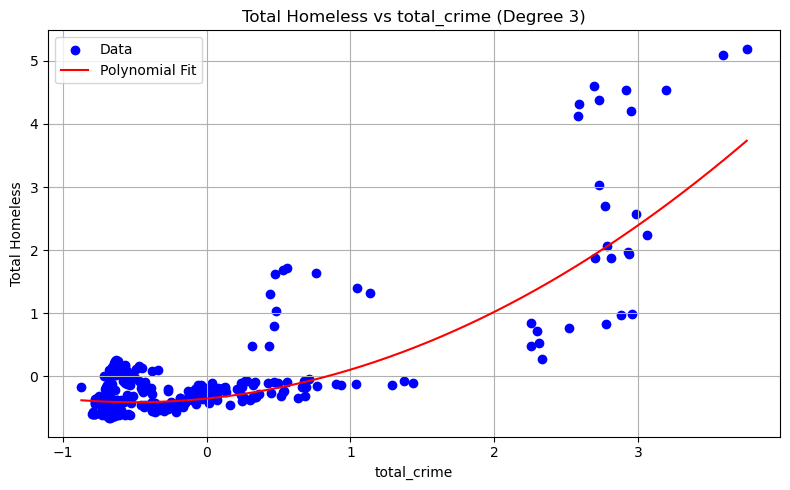

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\ilter\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([255])) that is different to the input size (torch.Size([255, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


median_list_price vs Total Homeless | Degree 3 | MSE: 0.44


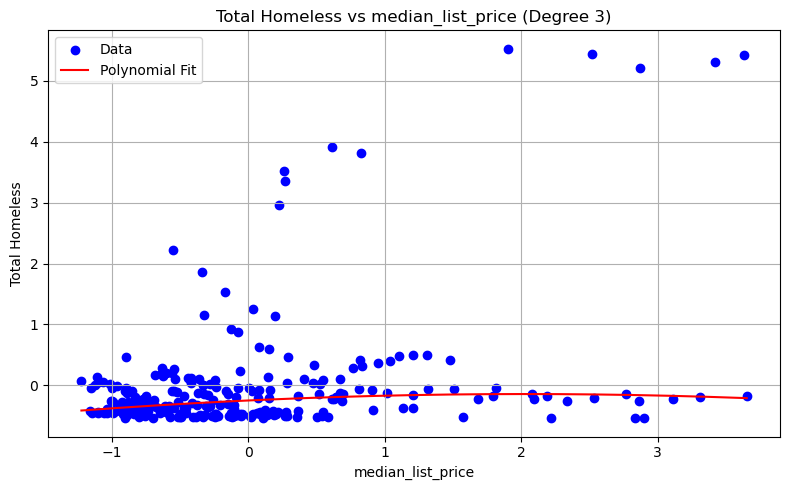

In [32]:
crime_estate_df = pd.read_csv("crime_estate_data.csv")
crime_homeless_df = pd.read_csv("crime_homeless_data.csv")
homeless_estate_df = pd.read_csv("homeless_estate_data.csv")

run_polynomial_regression(crime_estate_df, 'median_list_price', 'total_crime', degree=3)
run_polynomial_regression(crime_homeless_df, 'total_crime', 'Total Homeless', degree=3)
run_polynomial_regression(homeless_estate_df, 'median_list_price', 'Total Homeless', degree=3)